# PCA of Images

##  Single Image

In [1]:
import cv2
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

(320, 480, 3)


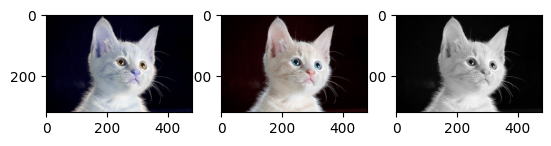

(320, 2)


In [2]:
# read image
image = cv2.imread("./cats/0.jpg")

print(image.shape)

f,axarr = plt.subplots(1,3)

axarr[0].imshow(image)

axarr[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
axarr[2].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.show()

# Let's extract PCA value from the gray image
pca = PCA(2)

std_data = pca.fit_transform(gray)

print(std_data.shape)

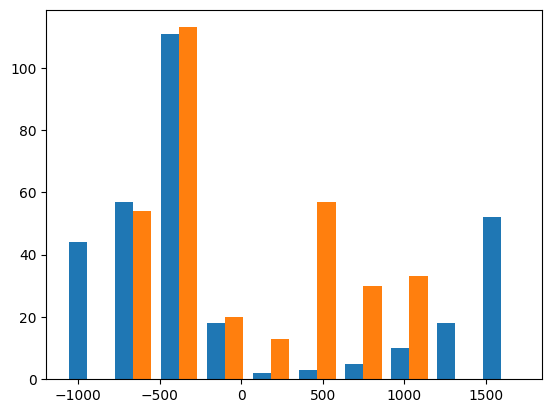

In [3]:
plt.hist(std_data)
plt.show()

# Multiple Images

In [4]:
import os

for file in os.listdir("./cats"):
    if file.endswith(".jpg"):
        print(os.path.join("./cats", file))

./cats/2.jpg
./cats/3.jpg
./cats/1.jpg
./cats/0.jpg


In [5]:
import numpy as np

images = []

for file in os.listdir("./cats"):
    if file.endswith(".jpg"):
        images.append(cv2.imread(os.path.join("./cats", file)))
        
print('Image Data Size : ', np.array(images).shape)

Image Data Size :  (4, 320, 480, 3)


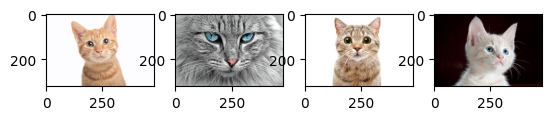

In [6]:
f, axarr = plt.subplots(1, len(images))

rgb_images = []

count = 0

for image in images:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rgb_images.append(rgb_image)
    axarr[count].imshow(rgb_image)
    count += 1
    
plt.show()

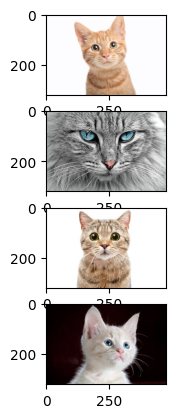

In [7]:
f, axarr = plt.subplots(len(images), 1)

rgb_images = []

count = 0

for image in images:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rgb_images.append(rgb_image)
    axarr[count].imshow(rgb_image)
    count += 1
    
plt.show()

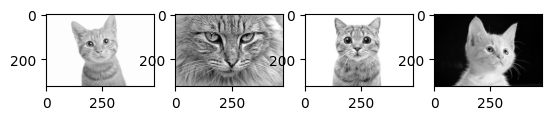

In [8]:
grays = []

f,axarr = plt.subplots(1, len(rgb_images))

for image in rgb_images:
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    grays.append(gray)
    
count = 0

for gray in grays:
    axarr[count].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    count += 1

In [28]:
while True:
    cv2.imshow("gray", grays[0])
    
    key = cv2.waitkey(1)
    if key == ord(q):
        break

    cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'waitkey'

In [9]:
from sklearn.decomposition import PCA

pca = PCA(2)

std_data = []

for gray in grays:
    std_data.append(pca.fit_transform(gray))

In [10]:
for data in std_data:
    print(data.shape)

(320, 2)
(320, 2)
(320, 2)
(320, 2)


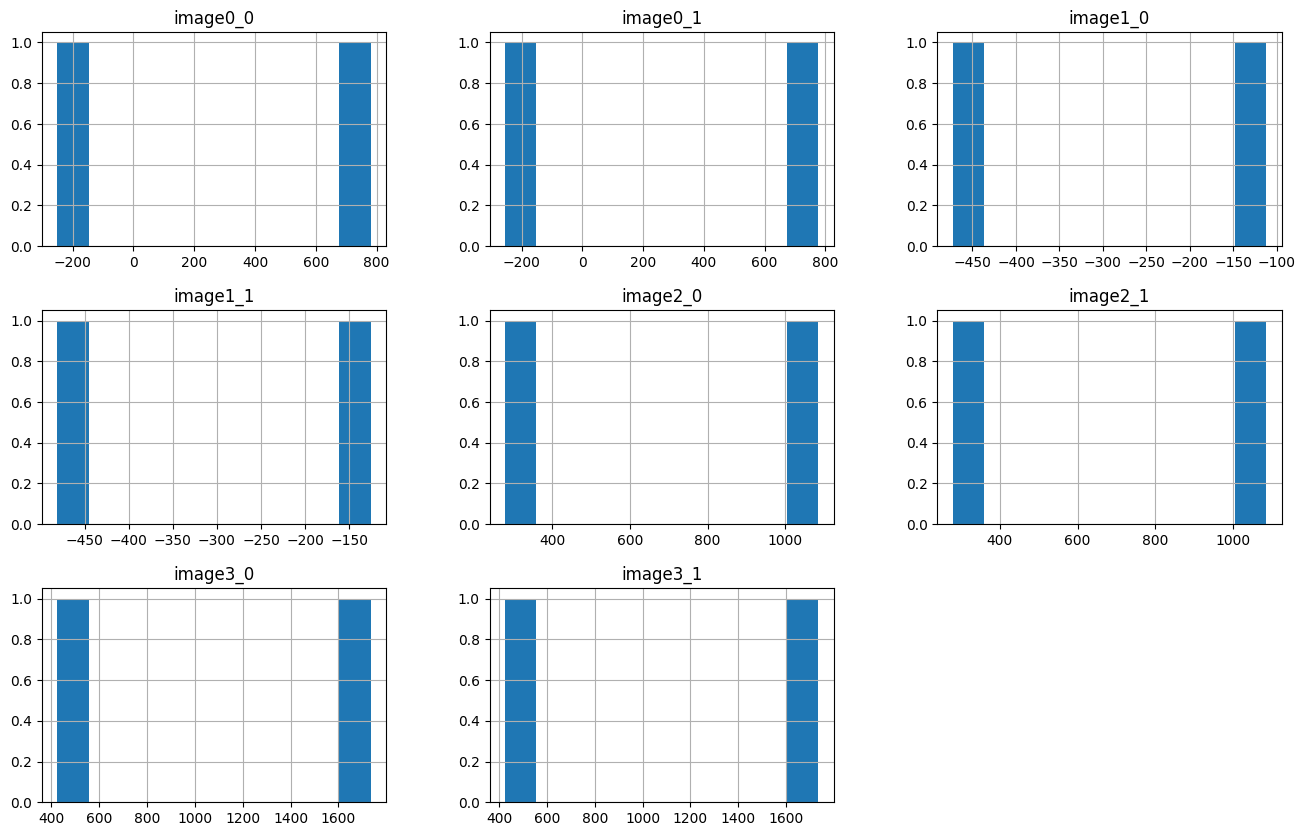

In [11]:
import pandas as pd

df = pd.DataFrame({'image0_0':std_data[0][0],
                   'image0_1':std_data[0][1],
                   'image1_0':std_data[1][0],
                   'image1_1':std_data[1][1],
                   'image2_0':std_data[2][0],
                   'image2_1':std_data[2][1],
                   'image3_0':std_data[3][0],
                   'image3_1':std_data[3][1],
                  })
df.hist(figsize = (16, 10))
plt.show()

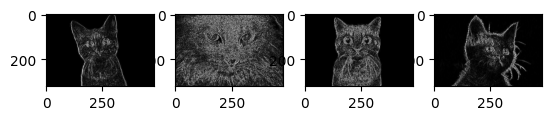

In [12]:
sobel = []

for gray in grays:
    soble_64 = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 3)
    abs_64 = np.absolute(soble_64)
    sobel_8u = np.uint8(abs_64)
    sobel.append(sobel_8u)
    
f, axarr = plt.subplots(1, len(sobel))

count = 0

for sob in sobel:
    axarr[count].imshow(cv2.cvtColor(sob, cv2.COLOR_BGR2RGB))
    count += 1
    
plt.show()

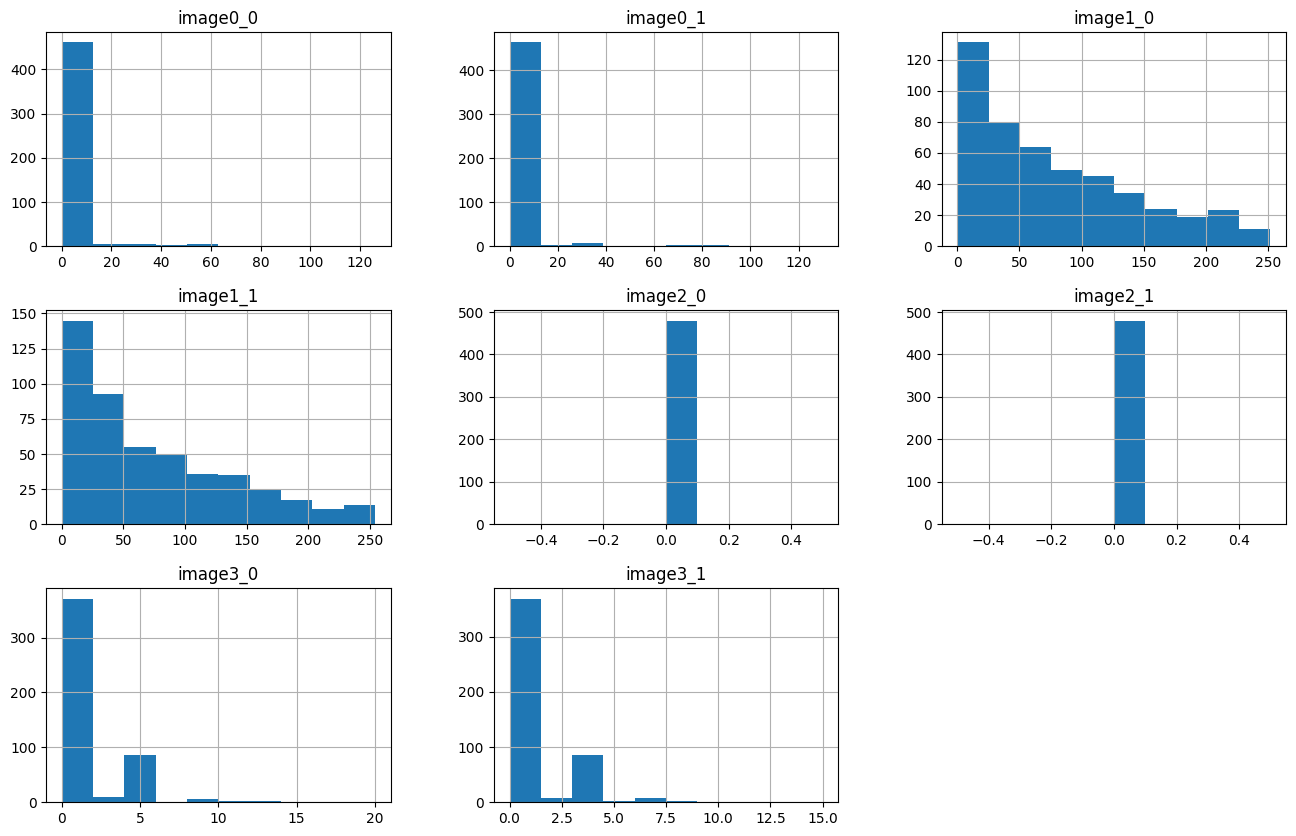

In [14]:

df = pd.DataFrame({'image0_0':sobel[0][0],
                   'image0_1':sobel[0][1],
                   'image1_0':sobel[1][0],
                   'image1_1':sobel[1][1],
                   'image2_0':sobel[2][0],
                   'image2_1':sobel[2][1],
                   'image3_0':sobel[3][0],
                   'image3_1':sobel[3][1],
                  })
df.hist(figsize = (16, 10))
plt.show()